In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

# Dateneinlesen

In [22]:

protokoll_path = r"00_Daten/abschreibung.csv"
abschreibungen = pd.read_csv(protokoll_path, encoding = 'unicode_escape', sep = ";", error_bad_lines = True)

protokoll_path = r"00_Daten/batchzahlen_gesamt.csv"
batchzahlen_gesamt = pd.read_csv(protokoll_path, encoding = 'unicode_escape', sep = ";", error_bad_lines = True)

protokoll_path = r"00_Daten/dps_lagerbelegung.csv"
dps_lagerbelegung = pd.read_csv(protokoll_path, encoding = 'unicode_escape', sep = ";", error_bad_lines = True)

protokoll_path =r"00_Daten/Filialen_Pro_Tag_DPS.csv"
filialen_Pro_Tag_DPS = pd.read_csv(protokoll_path, encoding = 'unicode_escape', sep = ";", error_bad_lines = True)

protokoll_path = r"00_Daten/We_te_eingelagert.csv"
we_te_eingelagert = pd.read_csv(protokoll_path, encoding = 'unicode_escape', sep = ";", error_bad_lines = True)


abschreibungen = abschreibungen[abschreibungen["Lager"] == "DPS"]
abschreibungen = abschreibungen[["Datum","Anteil_in_Prozent"]]
abschreibungen.columns = ["Datum","Abschreibung_in_Prozent"]

batchzahlen_gesamt = batchzahlen_gesamt[batchzahlen_gesamt["Lager"] == "DPS"]
batchzahlen_gesamt = batchzahlen_gesamt[["ï»¿Datum","VPE_Gesamt"]]
batchzahlen_gesamt.columns = ["Datum","Bestellzahlen_Gesamt"]

dps_lagerbelegung["Lager_Auslastung"] = dps_lagerbelegung["Belegt"] / dps_lagerbelegung["Gesamt"] 
dps_lagerbelegung = dps_lagerbelegung[["Datum","Lager_Auslastung"]]
dps_lagerbelegung.columns = ["Datum","Lager_Auslastung"]


filialen_Pro_Tag_DPS = filialen_Pro_Tag_DPS[["Packdatum","Filialen"]]
filialen_Pro_Tag_DPS.columns = ["Datum","Filialen_Kommissioniert_Gesamt"]

we_te_eingelagert = we_te_eingelagert[we_te_eingelagert["Lager"] == "DPS"]
we_te_eingelagert = we_te_eingelagert[["Datum", "TE"]]
we_te_eingelagert.columns = ["Datum","Te_Eingelagert"]

abschreibungen["Datum"] = pd.to_datetime(abschreibungen["Datum"])
batchzahlen_gesamt["Datum"] = pd.to_datetime(batchzahlen_gesamt["Datum"])
dps_lagerbelegung["Datum"] = pd.to_datetime(dps_lagerbelegung["Datum"])
filialen_Pro_Tag_DPS["Datum"] = pd.to_datetime(filialen_Pro_Tag_DPS["Datum"])
we_te_eingelagert["Datum"] = pd.to_datetime(we_te_eingelagert["Datum"])

#abschreibungen.set_index("Datum",inplace = True)
batchzahlen_gesamt.set_index("Datum",inplace = True)
dps_lagerbelegung.set_index("Datum",inplace = True)
filialen_Pro_Tag_DPS.set_index("Datum",inplace = True)
we_te_eingelagert.set_index("Datum",inplace = True)



In [23]:
merge=pd.merge(batchzahlen_gesamt,abschreibungen, how='left', left_index=True, right_index=True)
merge=pd.merge(merge,dps_lagerbelegung, how='left', left_index=True, right_index=True)
merge=pd.merge(merge,filialen_Pro_Tag_DPS, how='left', left_index=True, right_index=True)
merged =pd.merge(merge,we_te_eingelagert, how='left', left_index=True, right_index=True)


In [24]:
batchzahlen_gesamt['year'] = pd.DatetimeIndex(batchzahlen_gesamt['Datum']).year
batchzahlen_gesamt['month'] = pd.DatetimeIndex(batchzahlen_gesamt['Datum']).month
batchzahlen_gesamt['year_month'] = pd.to_datetime(batchzahlen_gesamt['Datum']).dt.to_period('M')
batchzahlen_gesamt['day'] = pd.DatetimeIndex(batchzahlen_gesamt['Datum']).day
batchzahlen_gesamt['day_of_week'] = batchzahlen_gesamt['Datum'].dt.day_name()
batchzahlen_gesamt.sort_values(by=['Datum'],ascending = True)
batchzahlen_gesamt.reset_index(drop=True, inplace=True)
batchzahlen_gesamt = batchzahlen_gesamt[batchzahlen_gesamt["day_of_week"] != "Sunday"]

In [27]:
merged['day_of_week'] = merged['Datum'].dt.day_name()
#merged['month'] = merged['Datum'].dt.month()
#merged['year'] = merged['Datum'].dt.year()

In [28]:
merged

,Bestellzahlen_Gesamt,Datum,Abschreibung_in_Prozent,Lager_Auslastung,Filialen_Kommissioniert_Gesamt,Te_Eingelagert,day_of_week
Datum,,,,,,,
2015-01-02,83685,NaT,NaN,NaN,NaN,NaN,NaN
2015-01-03,83810,NaT,NaN,NaN,NaN,NaN,NaN
2015-01-05,74101,NaT,NaN,NaN,NaN,NaN,NaN
2015-01-06,56912,NaT,NaN,NaN,NaN,NaN,NaN
2015-01-07,58630,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-24,64783,NaT,NaN,NaN,90.0,NaN,NaN
2021-11-25,69864,NaT,NaN,NaN,121.0,NaN,NaN
2021-11-26,61502,NaT,NaN,NaN,95.0,NaN,NaN


In [12]:
plt.rcParams["figure.figsize"] = (50,50)

array([<AxesSubplot:xlabel='Datum'>, <AxesSubplot:xlabel='Datum'>,
       <AxesSubplot:xlabel='Datum'>, <AxesSubplot:xlabel='Datum'>,
       <AxesSubplot:xlabel='Datum'>], dtype=object)

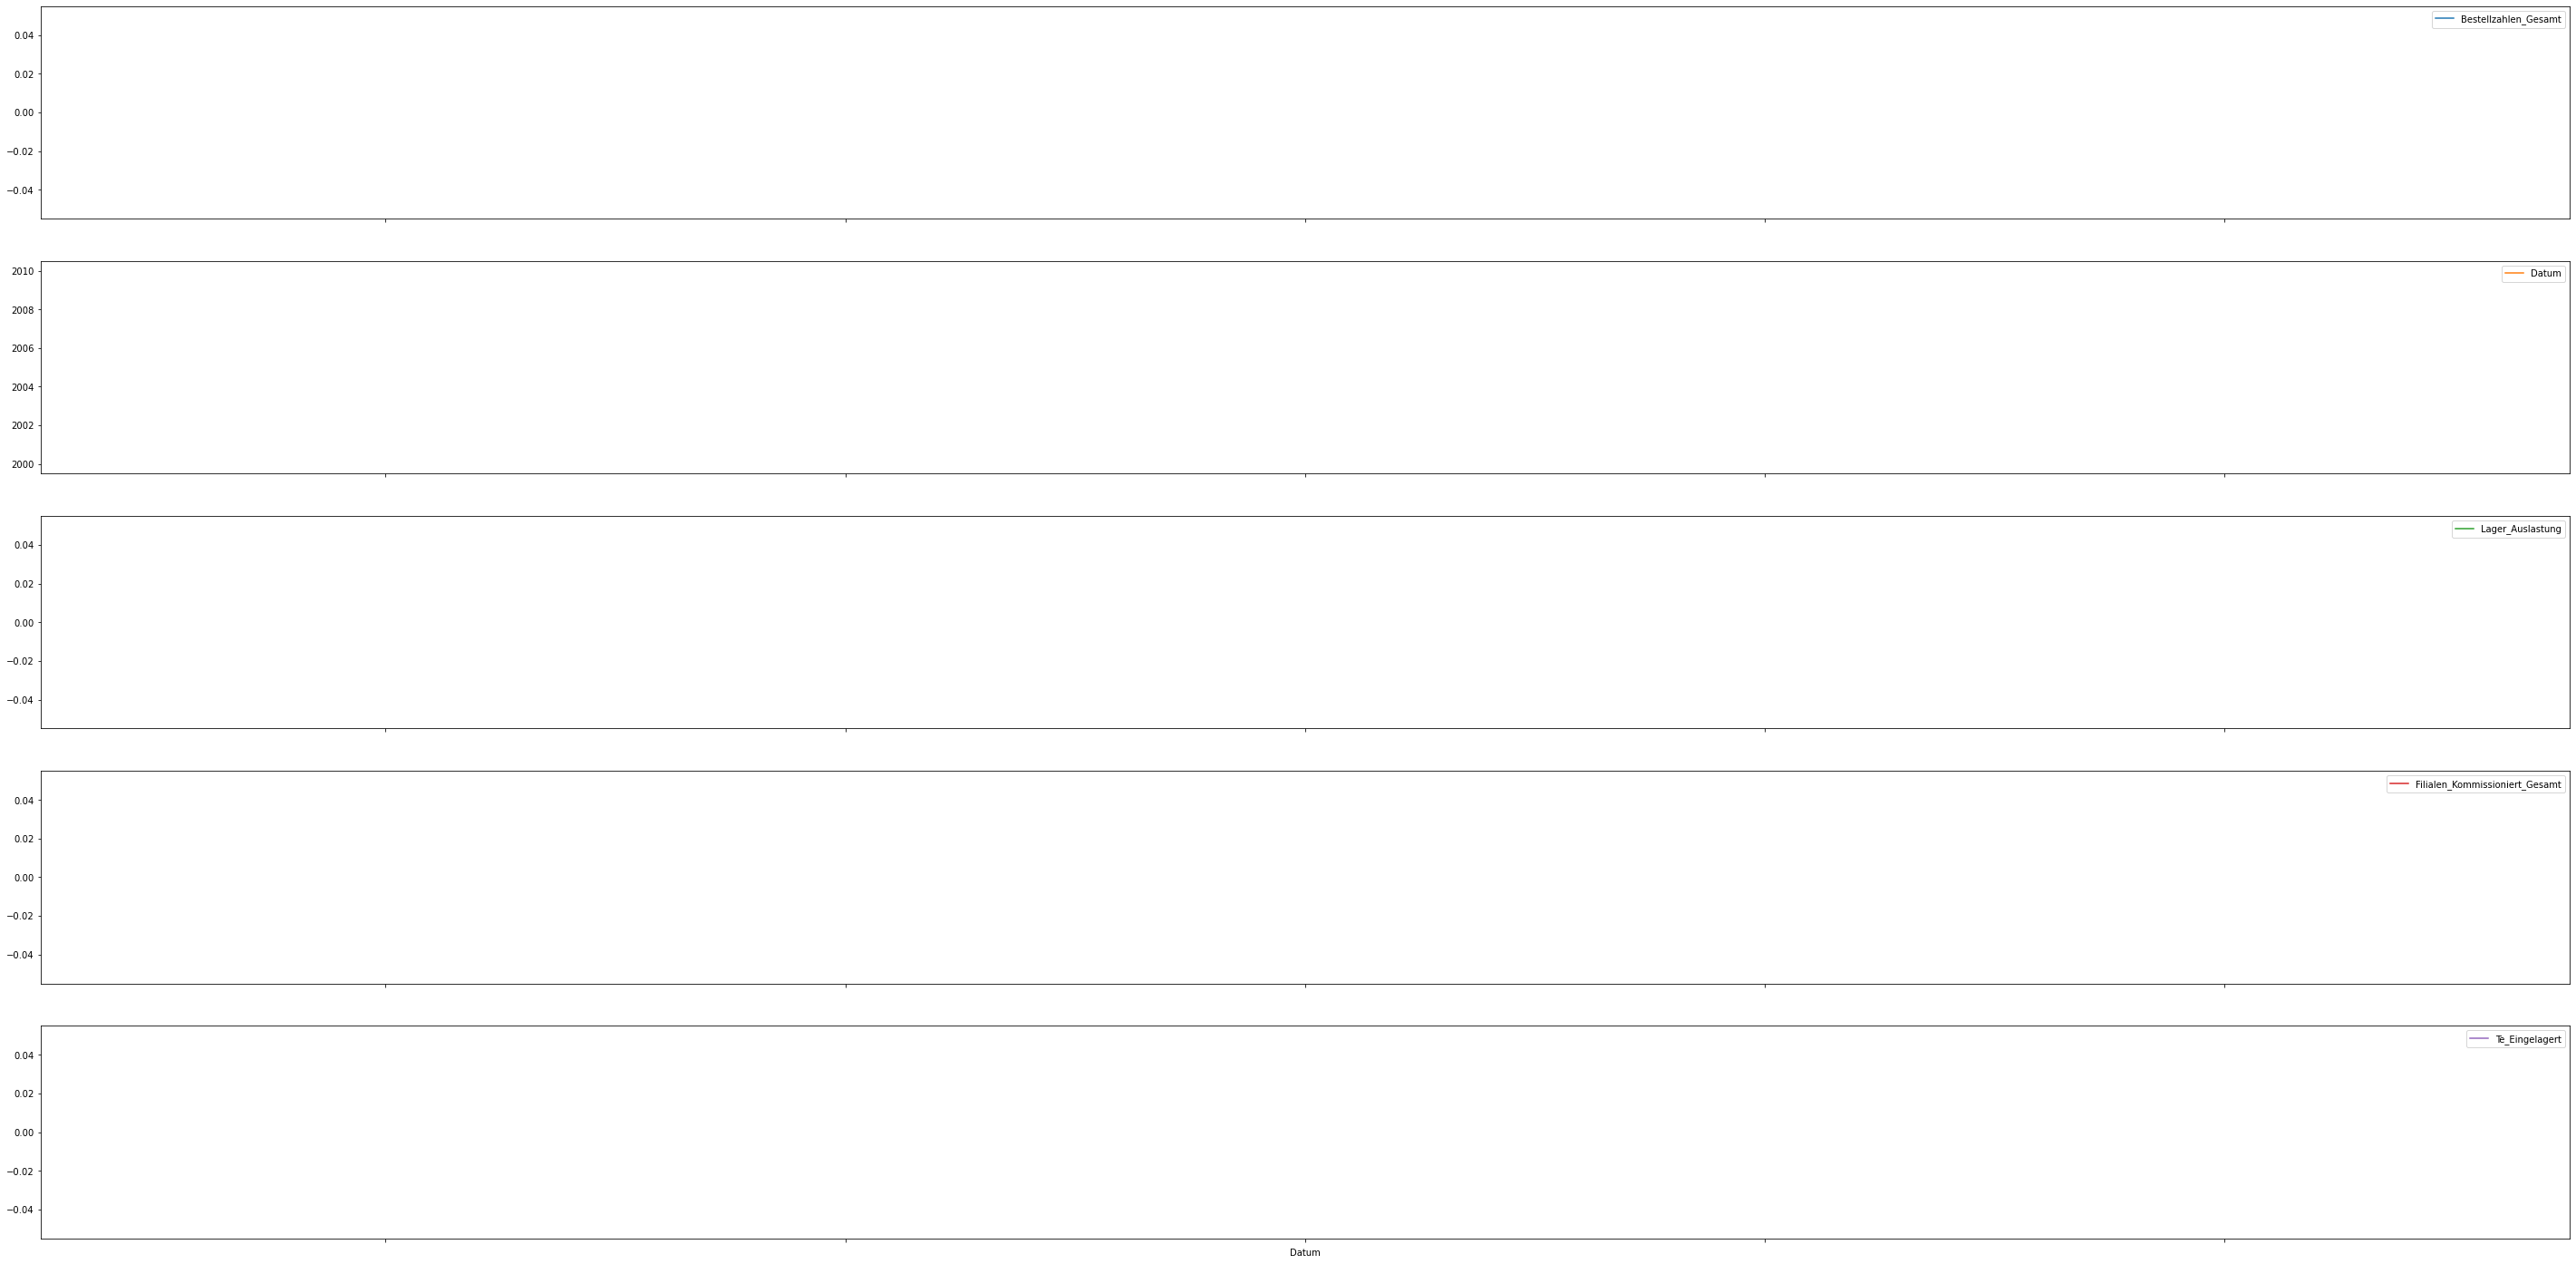

In [13]:
merged_no_nan.plot(subplots=True, figsize=(50,25))

In [14]:
merged_no_nan

,Bestellzahlen_Gesamt,Datum,Abschreibung_in_Prozent,Lager_Auslastung,Filialen_Kommissioniert_Gesamt,Te_Eingelagert
Datum,,,,,,


KeyError: '5-2017'

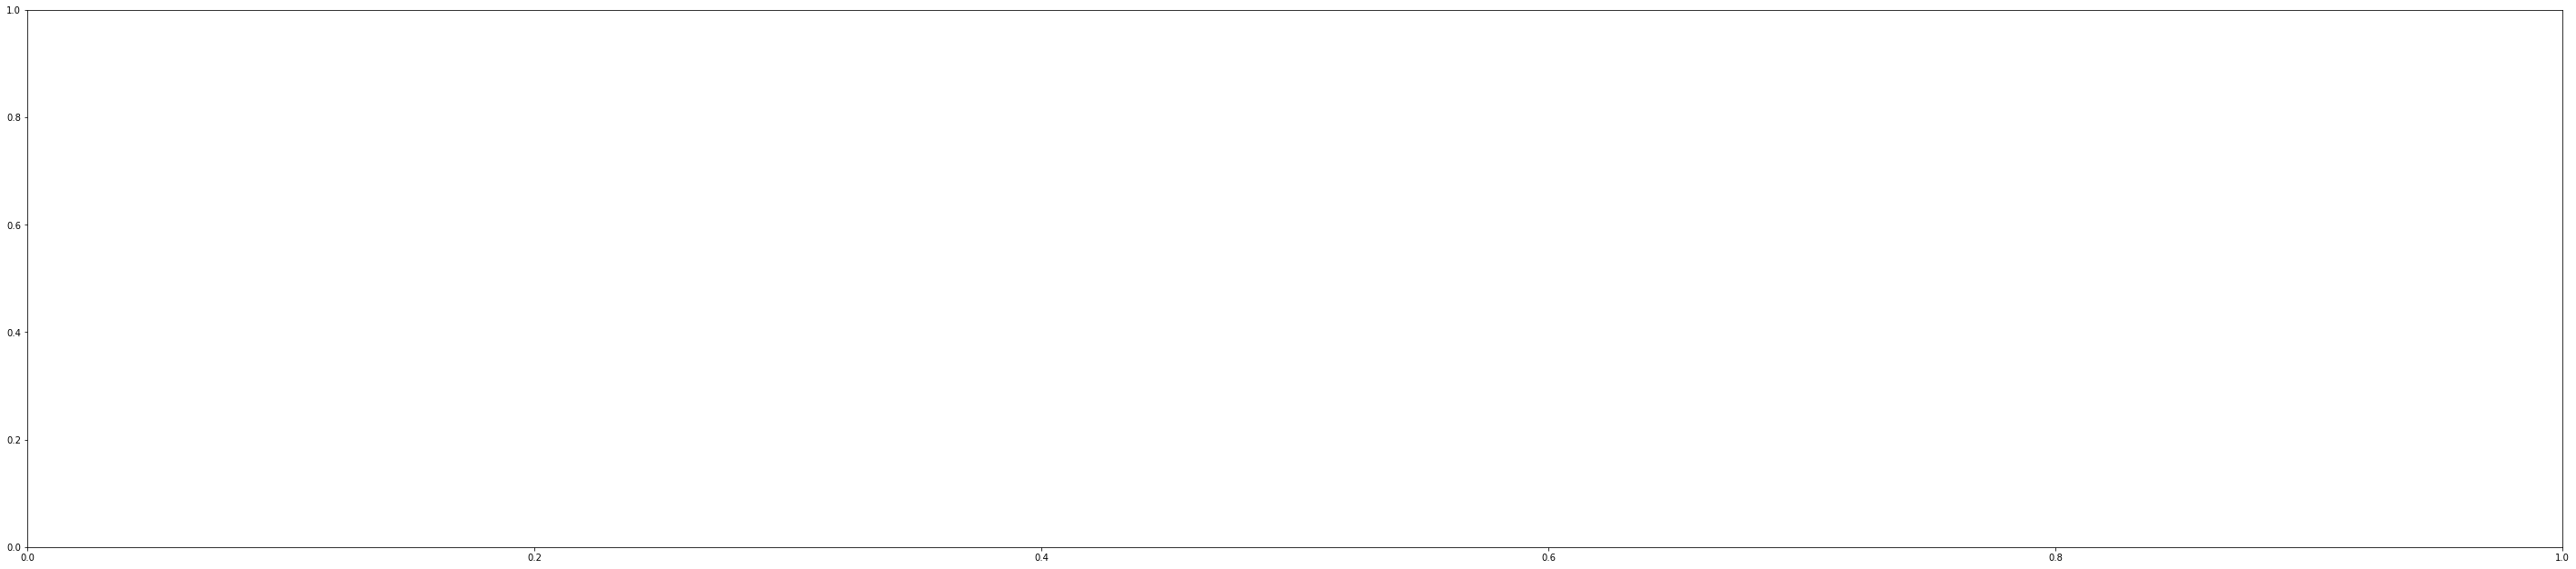

In [15]:

years = ['5-2017', '5-2018', '5-2019', '5-2020']
#years = ['2017']
plt.figure()
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = merged[str(year)]
    # plot the active power for the year
    result['Bestellzahlen_Gesamt'].plot()
    # add a title to the subplot
    plt.title(str(year), y=0, loc='left')
# turn off ticks to remove clutter
    plt.yticks([])
    plt.xticks([])
plt.show()
    

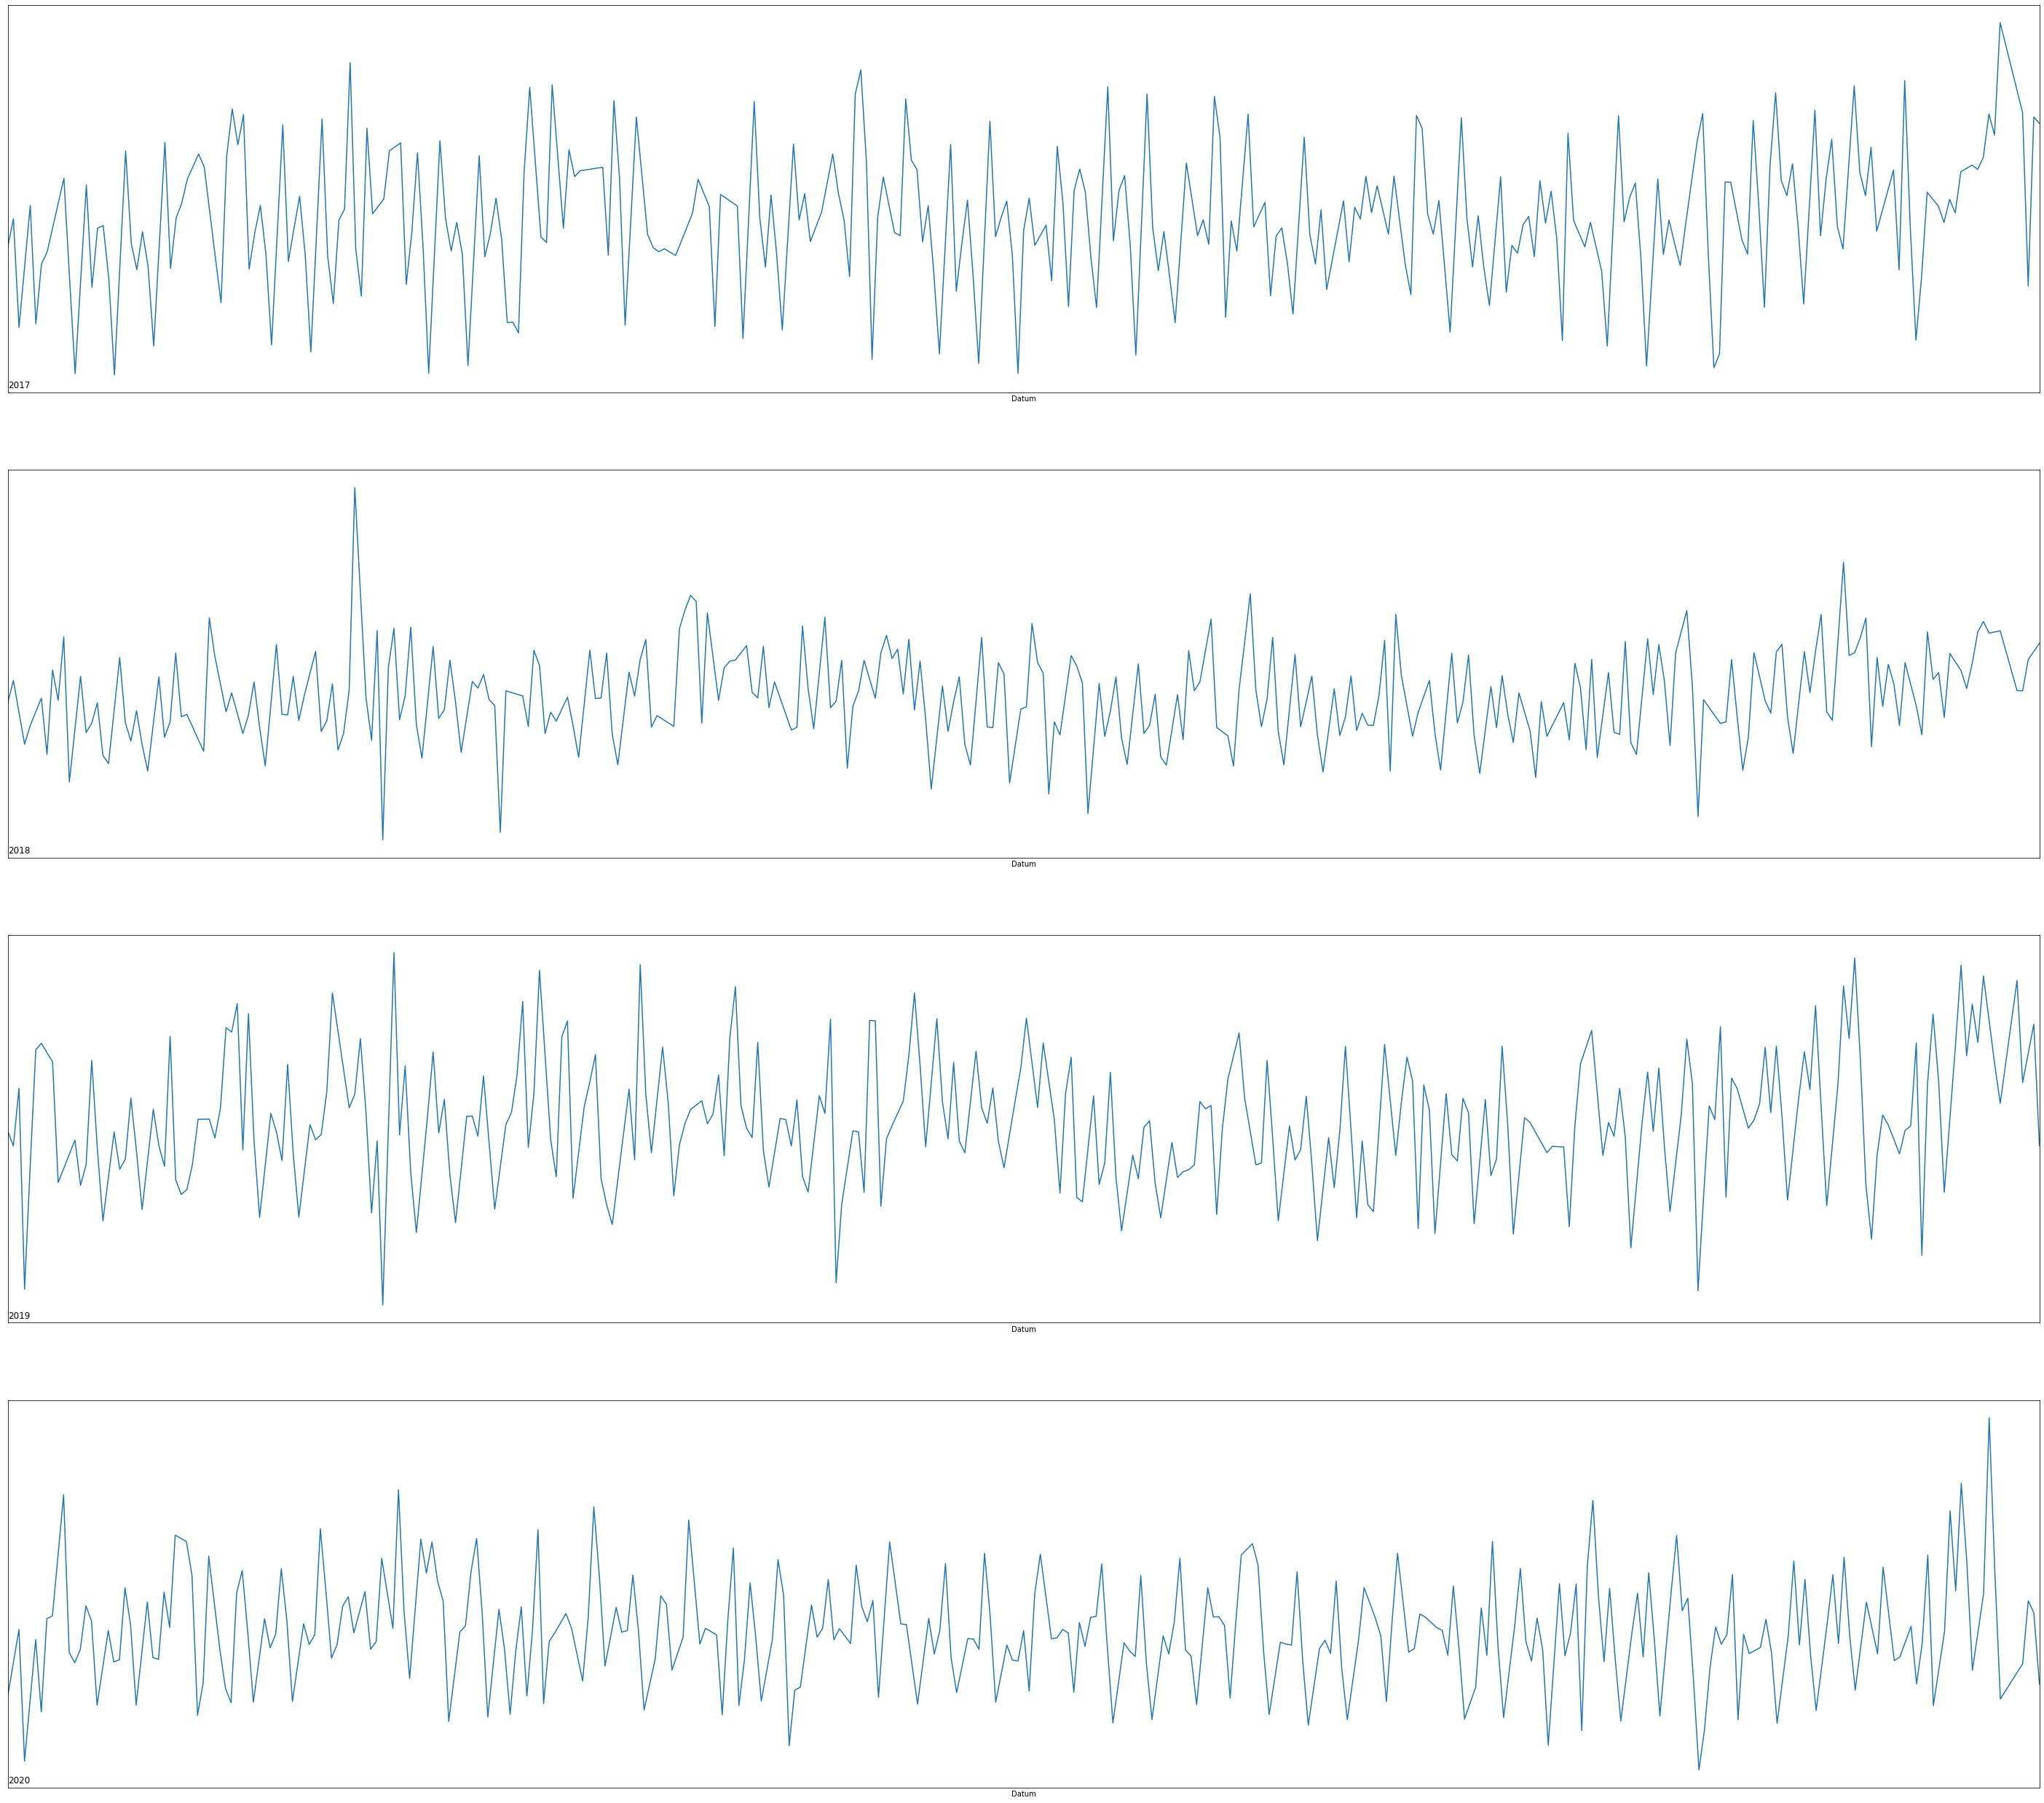

In [124]:

years = ['2017', '2018', '2019', '2020']
#years = ['2017']
plt.figure()
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = merged[str(year)]
    # plot the active power for the year
    result['Bestellzahlen_Gesamt'].plot()
    # add a title to the subplot
    plt.title(str(year), y=0, loc='left')
# turn off ticks to remove clutter
    plt.yticks([])
    plt.xticks([])
plt.show()

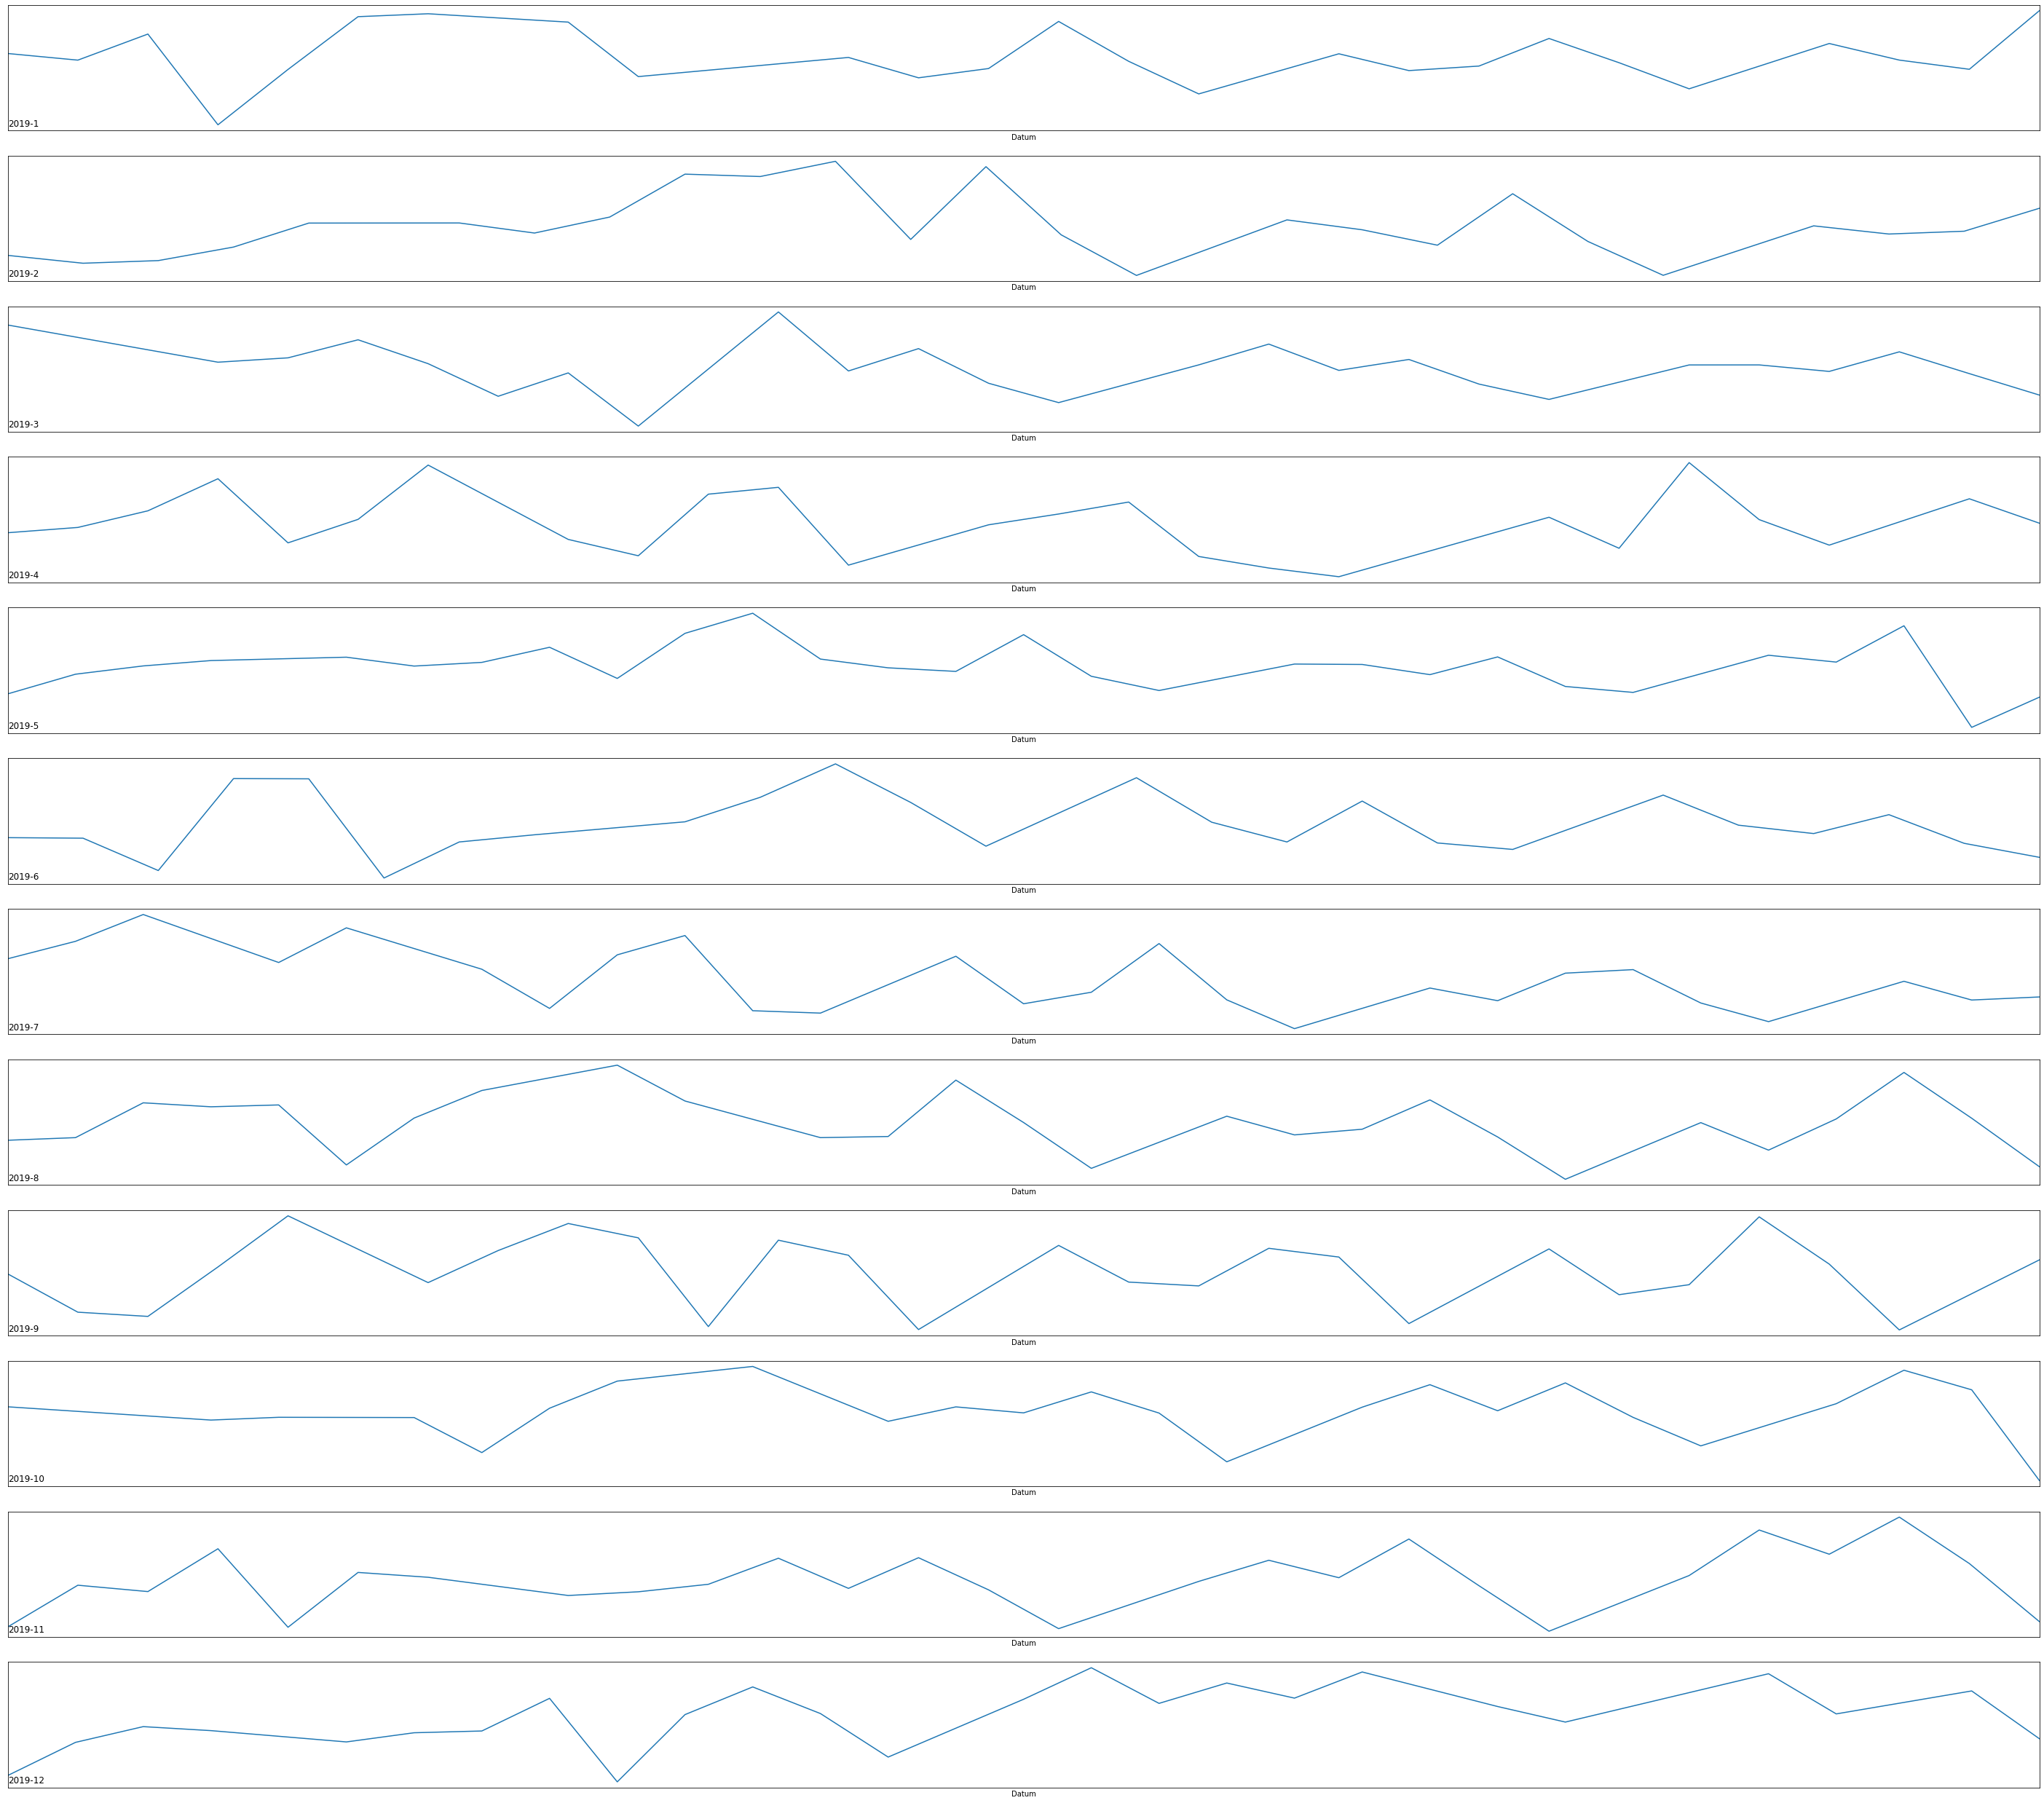

In [126]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure()
for i in range(len(months)):
# prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2019-' + str(months[i])
    # get all observations for the month
    result = merged[month]
    # plot the active power for the month
    result['Bestellzahlen_Gesamt'].plot()
    # add a title to the subplot
    plt.title(month, y=0, loc='left')
    # turn off ticks to remove clutter
    plt.yticks([])
    plt.xticks([])
plt.show()

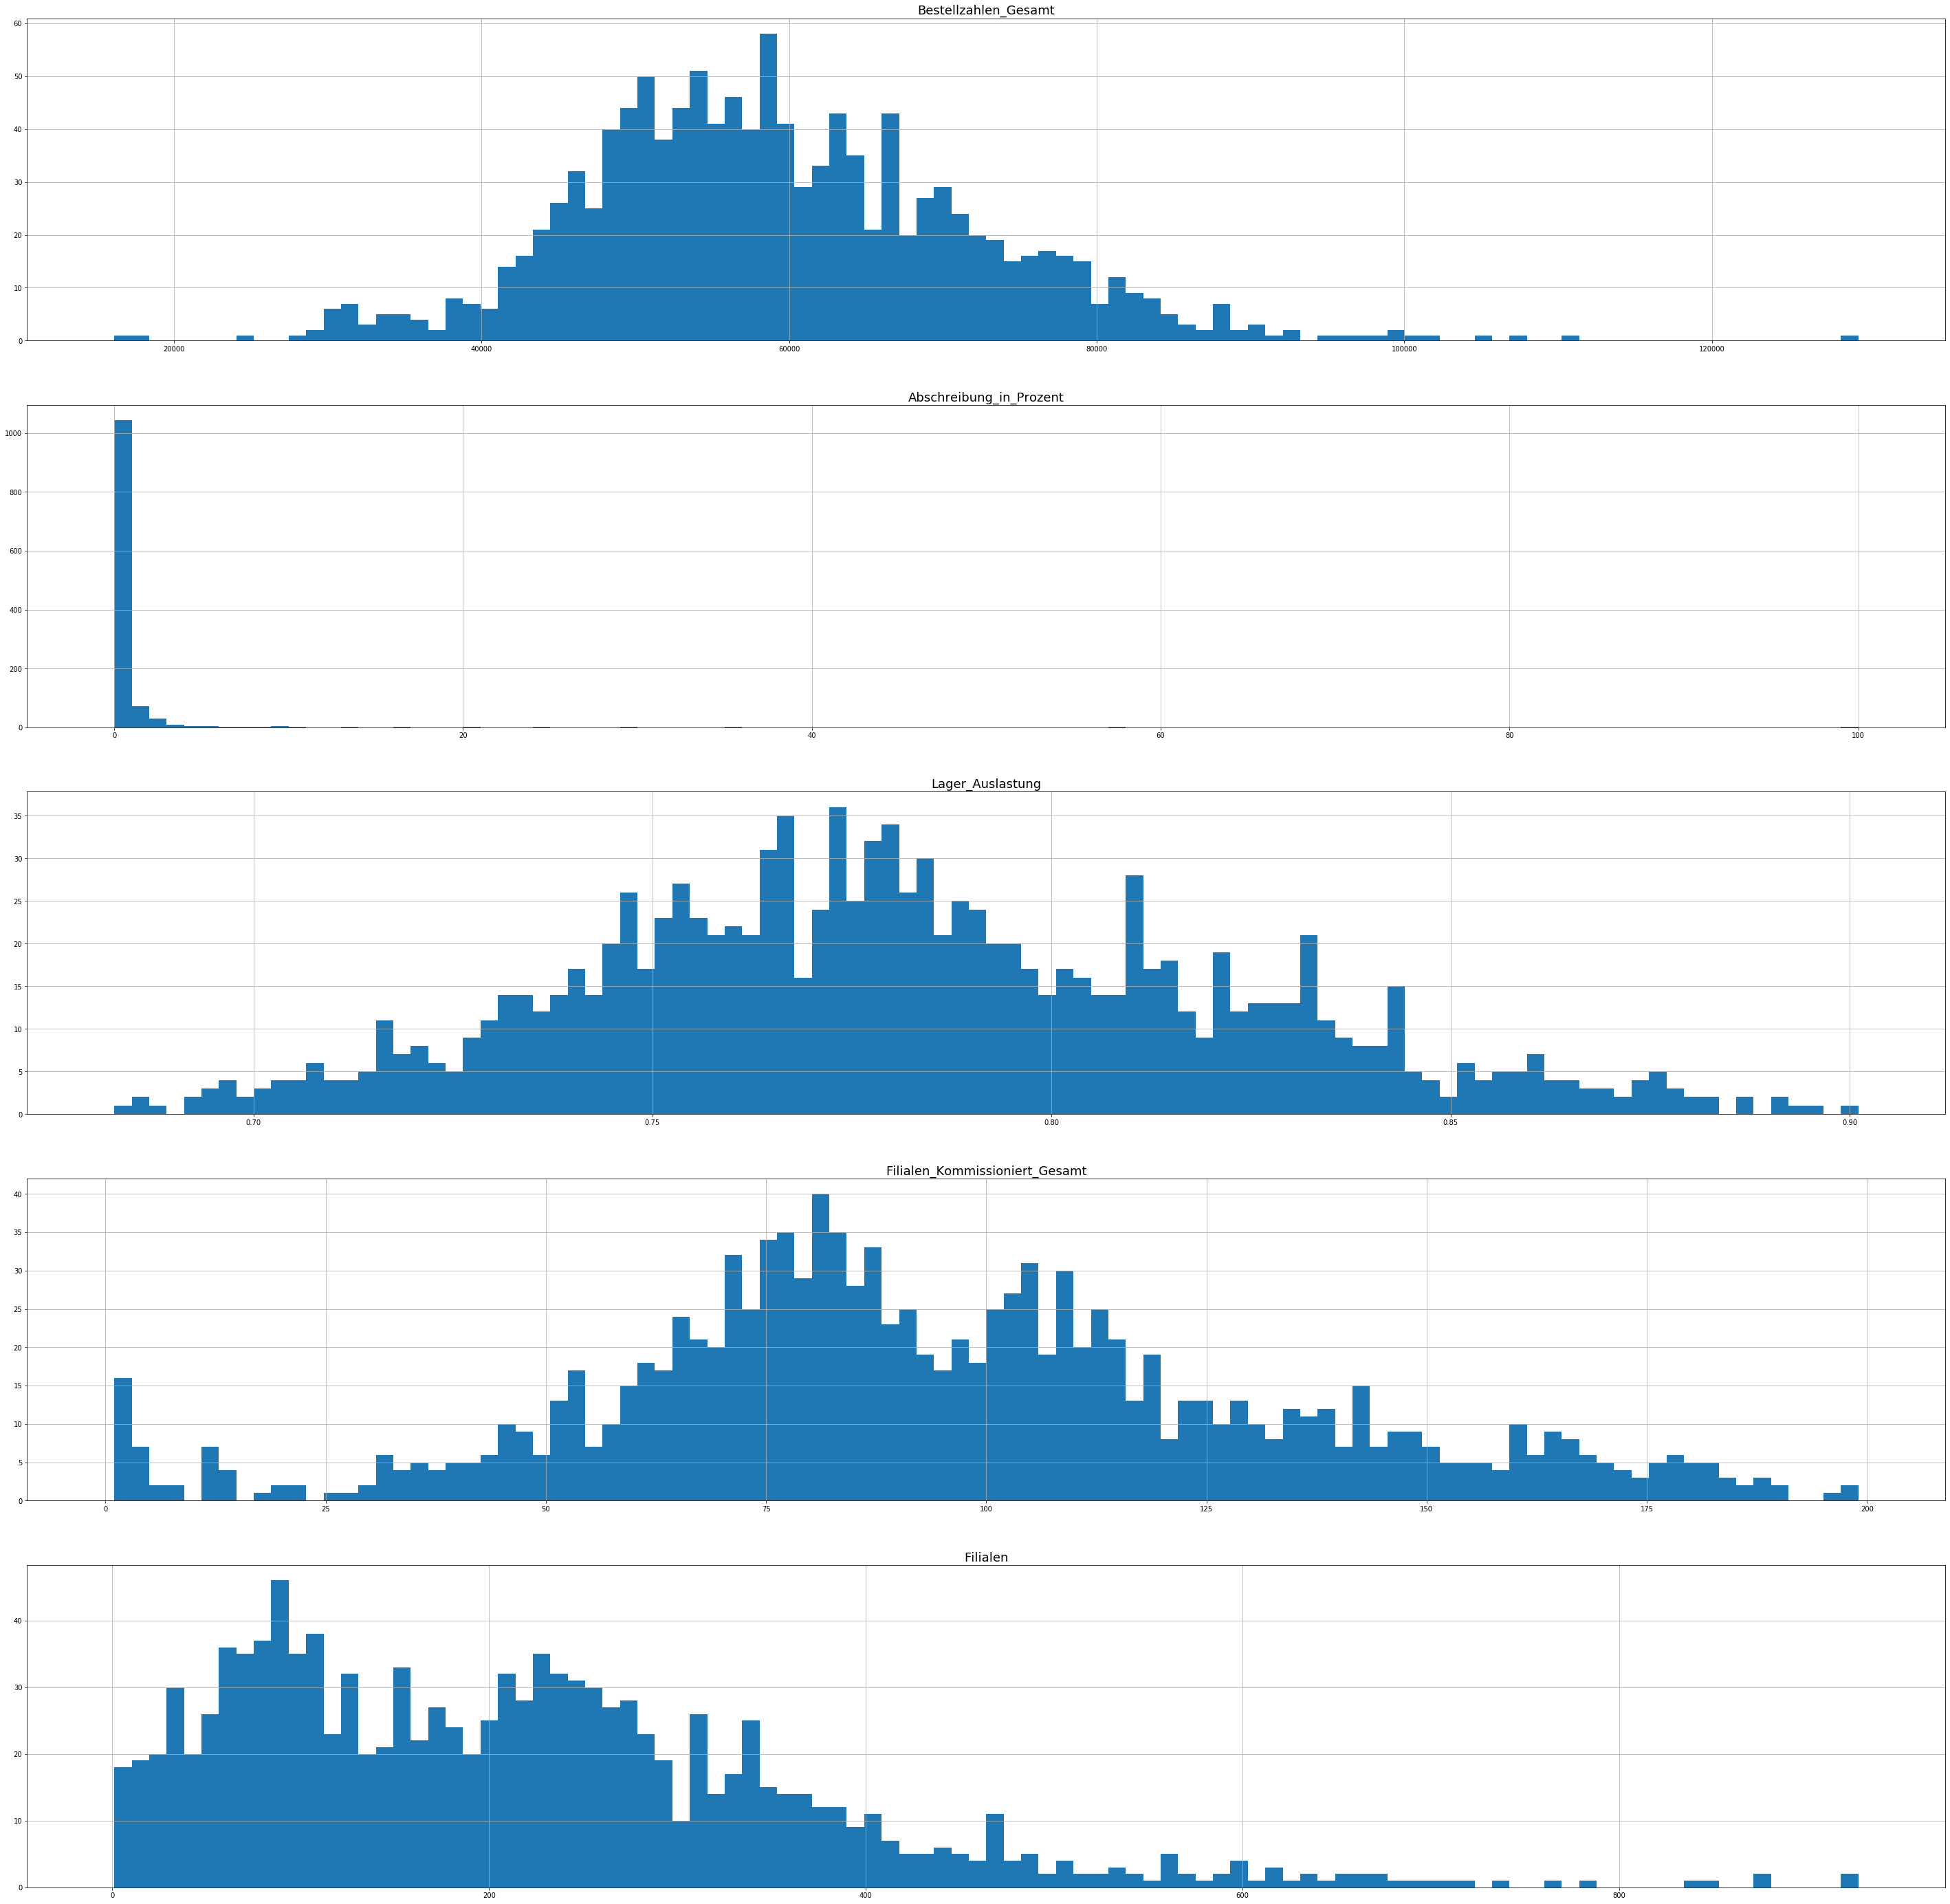

In [134]:
# histogram plot for each variable
plt.figure()
for i in range(len(merged_no_nan.columns)):
    # create subplot
    plt.subplot(len(merged_no_nan.columns), 1, i+1)
    # get variable name
    name = merged_no_nan.columns[i]
     # create histogram
    merged_no_nan[name].hist(bins=100)
    # set title
    plt.title(name,fontsize=18)
    # turn off ticks to remove clutter
    #plt.yticks([])
    #plt.xticks([])
plt.show()

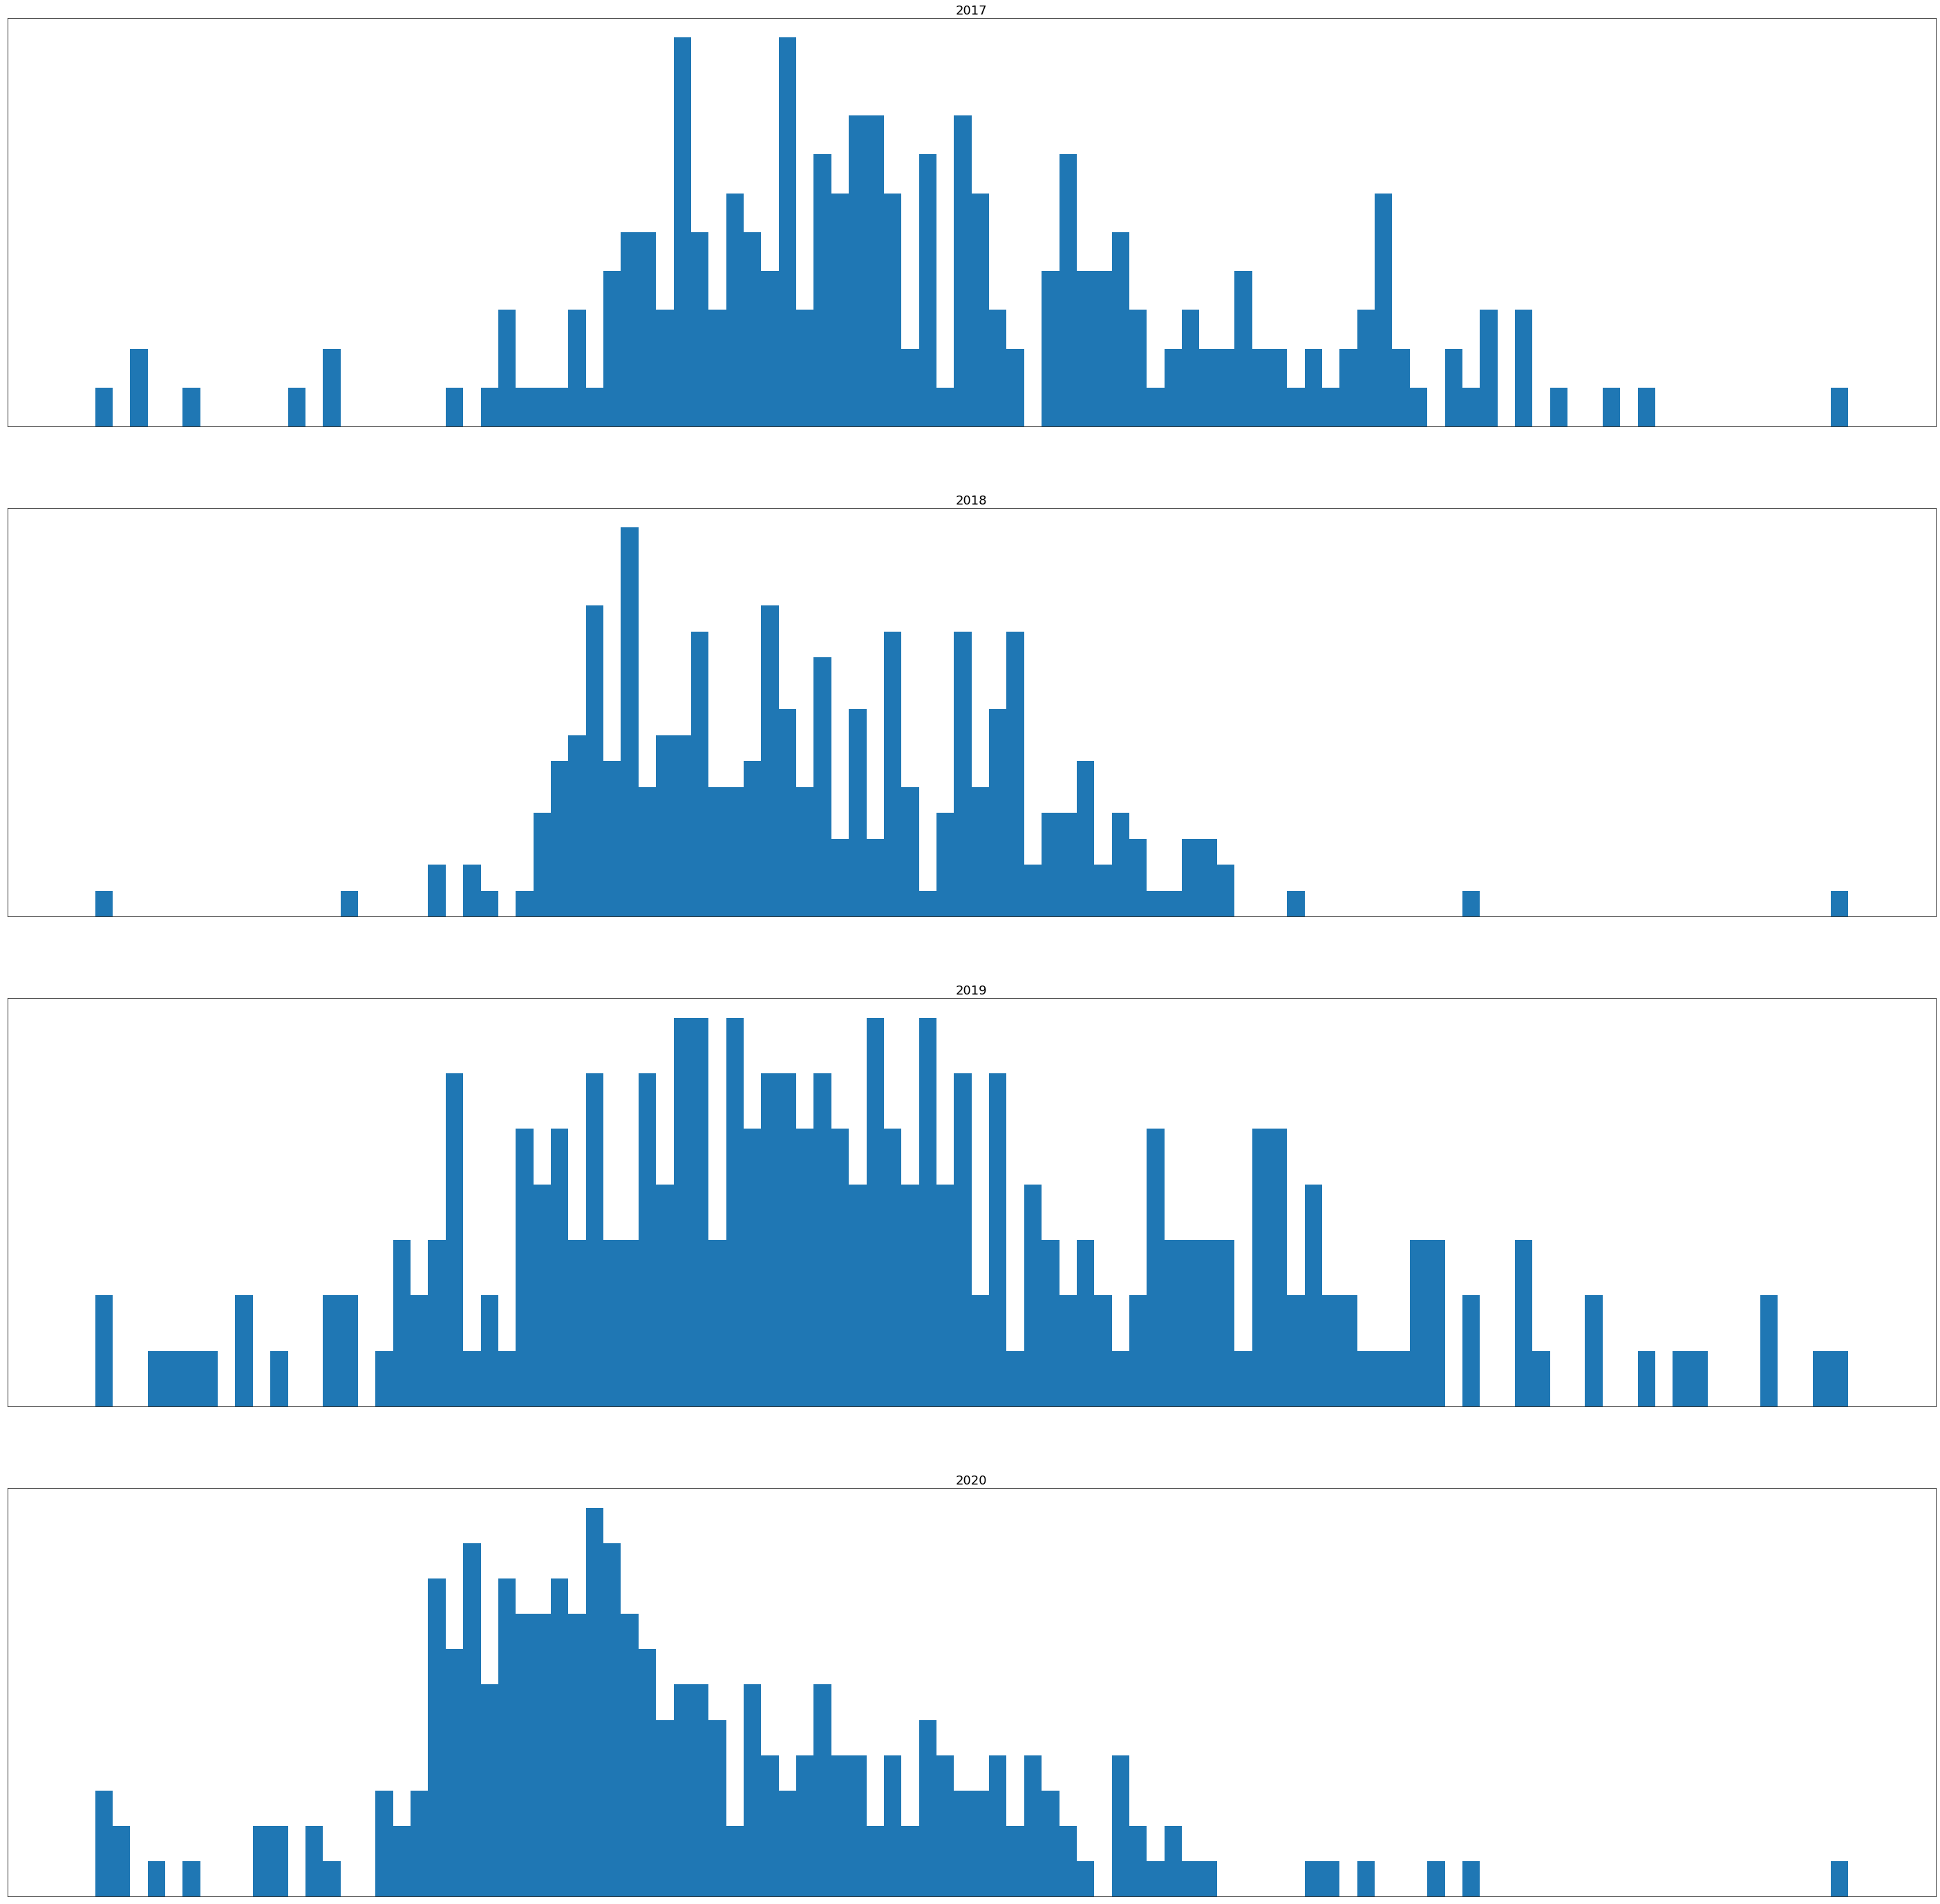

In [137]:
# plot active power for each year
years = ['2017', '2018', '2019', '2020']
plt.figure()
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = merged_no_nan[str(year)]
    # plot the active power for the year
    result['Bestellzahlen_Gesamt'].hist(bins=100)
    # zoom in on the distribution
    #ax.set_xlim(0, 5)
    # add a title to the subplot
    plt.title(str(year),fontsize=18)
    # turn off ticks to remove clutter
    plt.yticks([])
    plt.xticks([])
plt.show()

In [ ]:
Naive methods would include methods that make very simple, but often very eective assump-
tions. Some examples include:
 Tomorrow will be the same as today.
 Tomorrow will be the same as this day last year.
 Tomorrow will be an average of the last few days.

Generally, neural networks have not proven very eective at autoregression type problems.
Nevertheless, techniques such as convolutional neural networks are able to automatically learn
complex features from raw data, including one-dimensional signal data. And recurrent neural
networks, such as the long short-term memory network, are capable of directly learning across
multiple parallel sequences of input data. Further, combinations of these methods, such as
CNN-LSTM and ConvLSTM, have proven eective on time series classication tasks. It is
possible that these methods may be able to harness the large volume of minute-based data and
multiple input variables.

In [33]:
batch_file_DPS["VPE_Gesamt"].plot.hist(edgecolor= "k").autoscale(axis ="x", tight= True)
plt.xlabel('Bestellung', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.title("Histogramm")
plt.savefig('histogram.png')

,Datum,Belegt,Gesamt
0,03.02.2017,43893,57341
1,04.02.2017,43204,57340
2,05.02.2017,42707,57396
3,06.02.2017,42298,57348
4,07.02.2017,41725,57341
...,...,...,...
1746,18.11.2021,50614,56851
1747,19.11.2021,48305,56833
1748,20.11.2021,48664,56850
1749,21.11.2021,47670,56848


In [ ]:
batch_file_DPS[["VPE_Gesamt","day_of_week"]].boxplot(by="day_of_week", grid=False,figsize=(10,10))
plt.xlabel('Wochentage', fontsize=12)
plt.ylabel('Bestellungen', fontsize=12)
plt.title("Box-Plot")
plt.savefig('boxallweekdays.png')

In [34]:
batch_file_DPS[["VPE_Gesamt","Week_Number"]].boxplot(by="Week_Number", grid=False,figsize=(20,10))
plt.xlabel('Kalenderwochen', fontsize=12)
plt.ylabel('Bestellungen', fontsize=12)
plt.title("Box-Plot")
plt.savefig('boxallweek.png')

,Datum,TE
0,02.01.2017,172
4,03.01.2017,126
7,04.01.2017,82
11,05.01.2017,81
14,06.01.2017,179
...,...,...
4361,16.11.2021,215
4364,17.11.2021,44
4368,18.11.2021,31
4371,19.11.2021,342


In [ ]:
index_date["VPE_Gesamt"].plot()
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Bestellungen', fontsize=12)
plt.title("Linechart Gesamter Zeitraum")
plt.savefig('linechartgesatm.png'

In [ ]:
index_date["VPE_Gesamt"].iloc[-300:-200].plot(figsize=(20,10)).autoscale(axis ="x", tight= True)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Bestellungen', fontsize=12)
plt.title("Linechart 100 Tage")
plt.savefig('linechart100.png')

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(index_day_of_week, annot=True,fmt='g')
plt.savefig('heatweekday.png')

In [ ]:
low = .05
high = .95
quant_df = batch_file_DPS.quantile([low, high])
print(quant_df)
batch_file_DPS = batch_file_DPS[["VPE_Gesamt"]]
batch_file_DPS = batch_file_DPS.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [ ]:
batch_file_DPS = batch_file_DPS[batch_file_DPS.Datum.dt.dayofweek != 6]

In [ ]:
# "broken" (staggered) dates
dates = batch_file_DPS["Datum"]
all_dates = pd.Series(batch_file_DPS["VPE_Gesamt"].tolist(), dates)

all_dates = all_dates.asfreq('D')
#batch_file.set_index('Datum', inplace= True)
#all_dates = all_dates.fillna(method="ffill")
all_dates.interpolate(method='time', inplace=True)

In [ ]:
X = []
Y = []

for i in range(0, len(all_dates) - n_steps):
    Y.append(all_dates[i])
    X.append(np.array(all_dates[i+1:i+n_steps + 1][::-1]))
    
X = np.array(X).reshape(-1, n_steps, 1)
Y = np.array(Y)

In [ ]:
n_steps = 60
steps_year = 20
X = []
Y = []

for i in range(0, len(all_dates)- (365*3 + steps_year + 1)):
  Y.append(all_dates[i + 365*3 + steps_year + 1])
  #2015
  #a = all_dates[i + 1:i+steps_year +1 ]
  #2016
  b = all_dates[i+365 + 1 : i+steps_year+365+1 ]
  #2017 
  c = all_dates[i+(365 * 2) +1 : i+steps_year+(365*2) +1]
  #2018 
  d = all_dates[i+(365 * 3) :i+steps_year+(365*3)]

  ss = pd.concat([b,c, d])
  ss = ss[::-1]
  X.append(np.array(ss))

X = np.array(X).reshape(-1, n_steps, 1)
Y = np.array(Y)
# y
#all_dates[30 + 1+ 365*3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=46)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(60, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dense(30,activation="relu" ))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model

model.summary()

In [ ]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(60, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer="adam")
model_lstm.summary()

In [ ]:
lstm_history = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=120, verbose=2)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer="adam")
model_cnn.summary()

In [ ]:
cnn_history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=2)

In [ ]:
subsequences = 2
timesteps = X_train.shape[1]//subsequences
X_train_series_sub = X_train.reshape((X_train.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = X_test.reshape((X_test.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer="adam")
model_cnn_lstm.summary()

In [ ]:
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, y_train, validation_data=(X_valid_series_sub, y_test), epochs=epochs, verbose=2)

In [ ]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('cnn_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('lstm_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('stacked_LSTM_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(cnn_lstm_history.history['loss'])
plt.plot(cnn_lstm_history.history['val_loss'])
plt.title('cnn_Lstm_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions_cnn = model_cnn.predict(X_test)

predictions_cnn_LSTM = model_cnn_lstm.predict(X_valid_series_sub)

predictions_LSTM = model_lstm.predict(X_test)

predictions_stacked_LSTM = model.predict(X_test)



mse_cnn = sklearn.metrics.mean_squared_error(y_test, predictions_cnn)
mse_cnn_LSTM = sklearn.metrics.mean_squared_error(y_test, predictions_cnn_LSTM)
mse_LSTM = sklearn.metrics.mean_squared_error(y_test, predictions_LSTM)
#mse_stacked_LSTM = sklearn.metrics.mean_squared_error(y_test, predictions_stacked_LSTM)#

naives_forecasting = sklearn.metrics.mean_squared_error(y_test, X_test[:,-1])

print("RMSE_CNN: %s" % math.sqrt(mse_cnn))
print("RMSE_CNN_LSTM: %s" % math.sqrt(mse_cnn_LSTM))
print("RMSE_LSTM: %s" % math.sqrt(mse_LSTM))
#print("RMSE_stacked_LSTM: %s" % math.sqrt(mse_stacked_LSTM))
print("")
print("RMSE_naives_forecasting: %s" % math.sqrt(naives_forecasting))